# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [25]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [26]:
df.shape

(979, 6)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [28]:
df.describe()


,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [29]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].str.len()
df.head()

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


In [30]:
# Calcula media, mediana y moda de la columna 'title_length'

# Media
media = df['title_length'].mean()

# Mediana
mediana = df['title_length'].median()

# Moda
moda = df['title_length'].mode()

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")



Media: 15.481103166496425
Mediana: 14.0
Moda: 0    12
Name: title_length, dtype: int64


In [31]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
# Rango
rango = df['title_length'].max() - df['title_length'].min()

# Varinza
varianza = df['title_length'].var()

# Desviacion Estandar
desviación_estándar = df['title_length'].std()

print(f"Rango: {rango}")
print(f"Varianza: {varianza}")
print(f"Desviación Estándar: {desviación_estándar}")

Rango: 67
Varianza: 72.1067488840288
Desviación Estándar: 8.491569282766807


In [32]:
# Calcula  y curtosis de la columna 'title_length'
asimetría = df['title_length'].skew()

curtosis = df['title_length'].kurt()

print(f"Asimetría (Skewness): {asimetría}")
print(f"Curtosis (Kurtosis): {curtosis}")


Asimetría (Skewness): 1.5252523464631278
Curtosis (Kurtosis): 3.8122887061291544


In [33]:
# Imprime el título más corto y el título más largo según su longitud

Largo = df.loc[df['title'].str.len().idxmax(), 'title']
Corto = df.loc[df['title'].str.len().idxmin(), 'title']

print(f"El título más largo: {Largo}")
print(f"El título más corto: {Corto}")


El título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
El título más corto: M


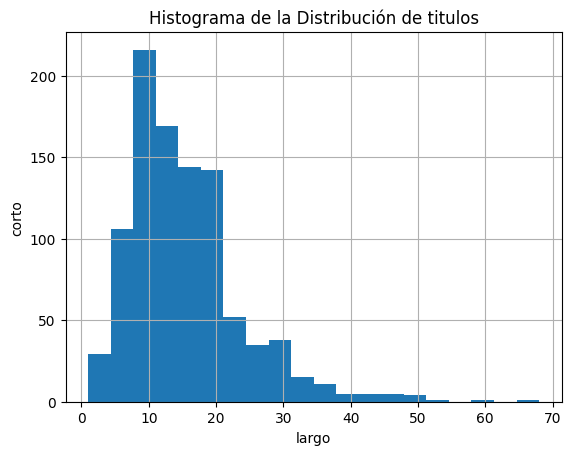

In [34]:
# grafica tus resultados
import matplotlib.pyplot as plt

df['title_length'].hist(bins=20)
plt.title('Histograma de la Distribución de titulos')
plt.xlabel('largo')
plt.ylabel('corto')
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [ ]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

title_lengths = 



SyntaxError: invalid syntax (3799670721.py, line 3)

In [ ]:
# Calcula la media de los 5 valores

In [ ]:
# Calcula las diferencias al cuadrado con respecto a la media

In [ ]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación